Target Variable
(int) Sales


Predictors
1..(int) TV - Budget of advertisements in TV
2..(int) Radio - Budget of advertisements in radio
3..(int) Newspaper - Budget of advertisements in newspaper

In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
# load the data set
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv',index_col = 0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.describe()  #get summary of the data

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# EDA

In [5]:
### Get Correlation of features
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [6]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [7]:
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [8]:
df['sales'].nunique()

121

In [9]:
df_visualization_continuous = df[["radio","newspaper","TV","sales"]].copy()

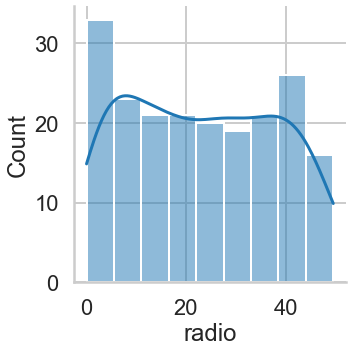

In [10]:
sns.displot(df_visualization_continuous['radio'],kde=True)


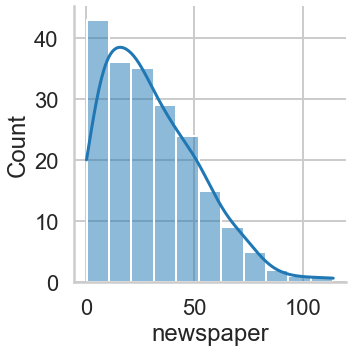

In [11]:
sns.displot(df_visualization_continuous['newspaper'],kde=True)


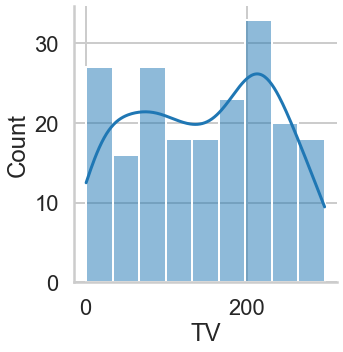

In [12]:
sns.displot(df_visualization_continuous['TV'],kde=True)


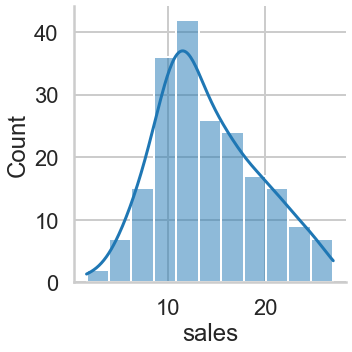

In [13]:
sns.displot(df_visualization_continuous['sales'],kde=True)


C:\Users\Dell\AppData\Local\Temp/ipykernel_9844/998163787.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


<AxesSubplot:>

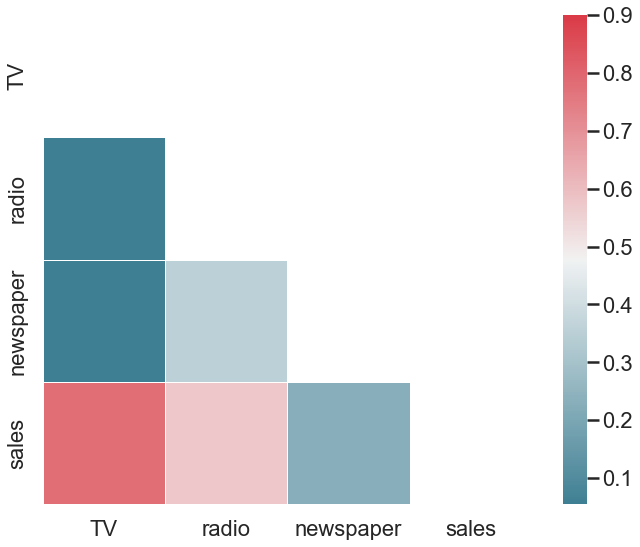

In [14]:
### Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

Since Sales is our target variable,  As we can see, TV has the highest correlation with Sales.


Text(0.5, 1.0, 'sales vs newspaper')

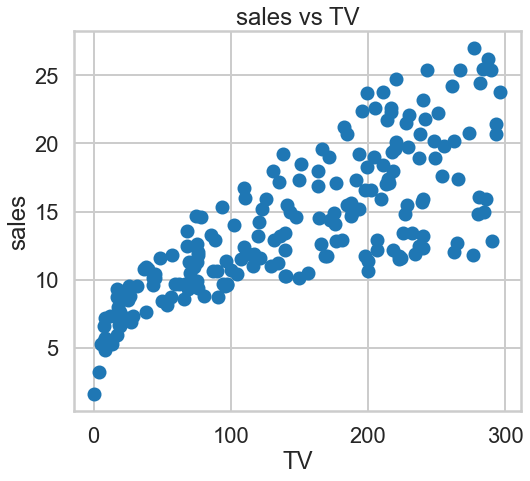

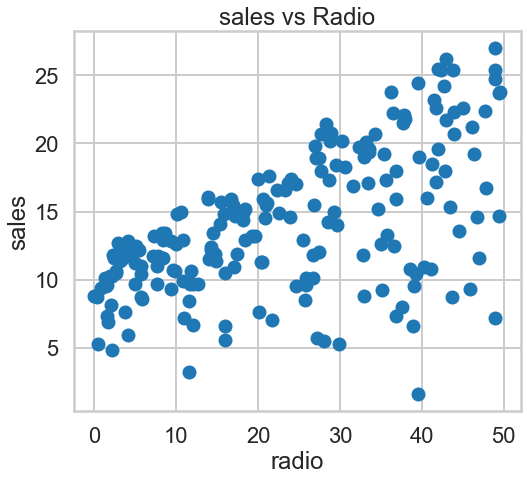

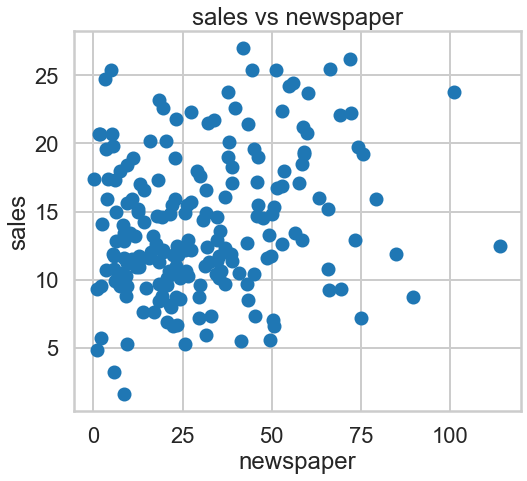

In [16]:
### Visualize the relationship using scatterplot

f, ax = plt.subplots(figsize=(8, 7))
plt.scatter(df["TV"], df["sales"])
plt.xlabel("TV")
plt.ylabel("sales")
plt.title("sales vs TV")

f, ax = plt.subplots(figsize=(8, 7))
plt.scatter(df["radio"], df["sales"])
plt.xlabel("radio")
plt.ylabel("sales")
plt.title("sales vs Radio")

f, ax = plt.subplots(figsize=(8, 7))
plt.scatter(df["newspaper"], df["sales"])
plt.xlabel("newspaper")
plt.ylabel("sales")
plt.title("sales vs newspaper")

finding the correlation ,the relationship between Sales and TV is more linear.

now find the relation between predictor

Text(0.5, 1.0, 'radio vs newspaper')

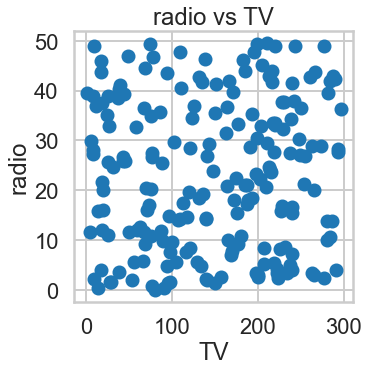

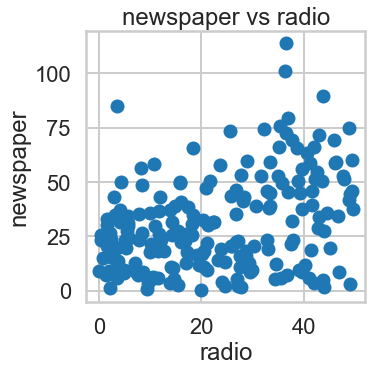

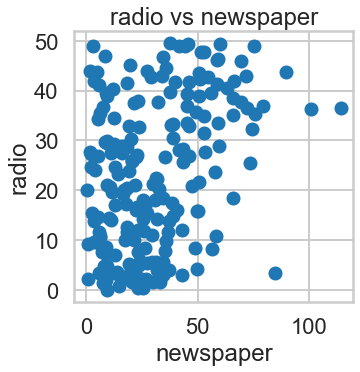

In [17]:
### Visualize the relationship using scatterplot

f, ax = plt.subplots(figsize=(5, 5))
plt.scatter(df["TV"], df["radio"])
plt.xlabel("TV")
plt.ylabel("radio")
plt.title("radio vs TV")

f, ax = plt.subplots(figsize=(5, 5))
plt.scatter(df["radio"], df["newspaper"])
plt.xlabel("radio")
plt.ylabel("newspaper")
plt.title("newspaper vs radio")

f, ax = plt.subplots(figsize=(5, 5))
plt.scatter(df["newspaper"], df["radio"])
plt.xlabel("newspaper")
plt.ylabel("radio")
plt.title("radio vs newspaper")

It seems there's no clear linear relationships between the predictors.

we know that the variable TV will more likely give better prediction of Sales because of the high correlation and linearity of the two.

In [29]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

All data lie between +/-5.. no column has skewness..

# checking outliers

<AxesSubplot:>

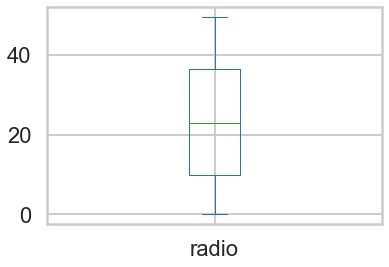

In [30]:
df["radio"].plot.box()

<AxesSubplot:>

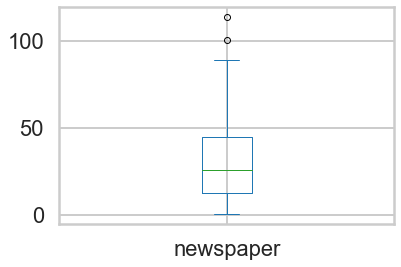

In [31]:
df["newspaper"].plot.box()

<AxesSubplot:>

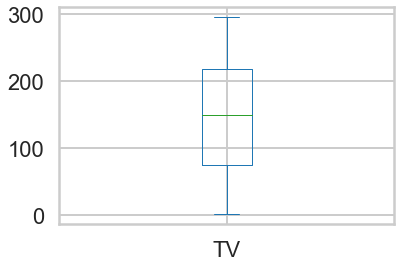

In [32]:
df["TV"].plot.box()

there are outliers present in only newspaper data

# Data model

In [18]:
### Separate the features and the target variable 
x = df.drop("sales", axis = 1)
y = df["sales"]

In [19]:
x

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [20]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

# scaling the data using Min-max scaler

In [33]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
### Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 40)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 3)
y_train size: (150,)

x_test size: (50, 3)
y_test size: (50,)


In [36]:
### Initialize dataframe that will store the results
df_results = pd.DataFrame(columns = ["Predictor/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

Firstly build the model then Evaluate the model

In [23]:
### Make a function for Linear Regression with default values
def linreg_model(xtrain, xtest):
    
    linreg = LinearRegression()
    linreg.fit(xtrain, y_train)
    
    ### Evaluate the model
    y_pred = linreg.predict(xtest)
    
    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))
    
    f, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")
    
    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test), 
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}


Using all predictors,,,
The results of this model that uses all of the predictor variable will be our basis on the next models.

R2: 0.7505549421786479
MAE: 1.433786686501823
MSE: 4.683699047117603
RMSE: 2.1641855389771005
Cross-Val Results: [0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]
Cross-Val Mean: 0.8853562237979616


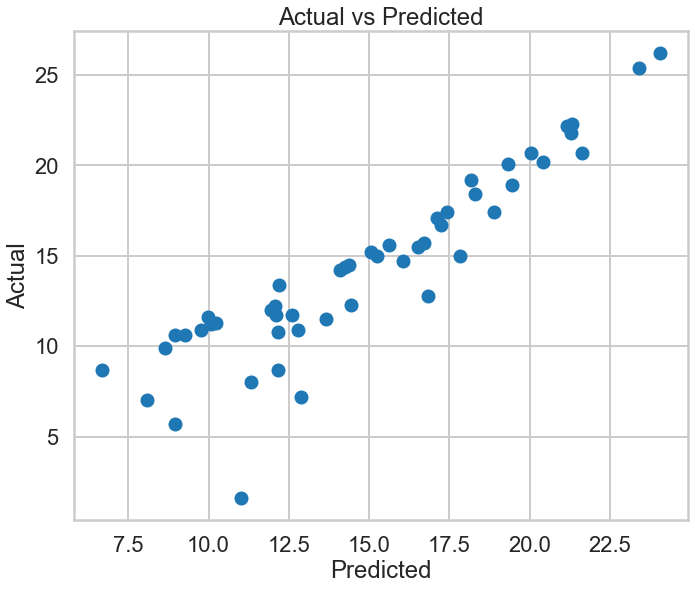

In [25]:
# Predict and get results
linreg_all_results = linreg_model(x_train, x_test)

# Cross Validation
cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())
      
linreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() * 100})

df_results = df_results.append(linreg_all_results, ignore_index=True)

Since TV shows more correlation and linearity with our target variable, let's try predicting Sales using only this variable.

R2: 0.43645835817925427
MAE: 2.3847584907321973
MSE: 10.210413575585514
RMSE: 3.195373777132421
Cross-Val Results: [0.70015158 0.43449405 0.58322591 0.78975123 0.47952235 0.62298657
 0.66525353 0.60389703 0.16530872 0.64237498]
Cross-Val Mean: 0.5686965937483904


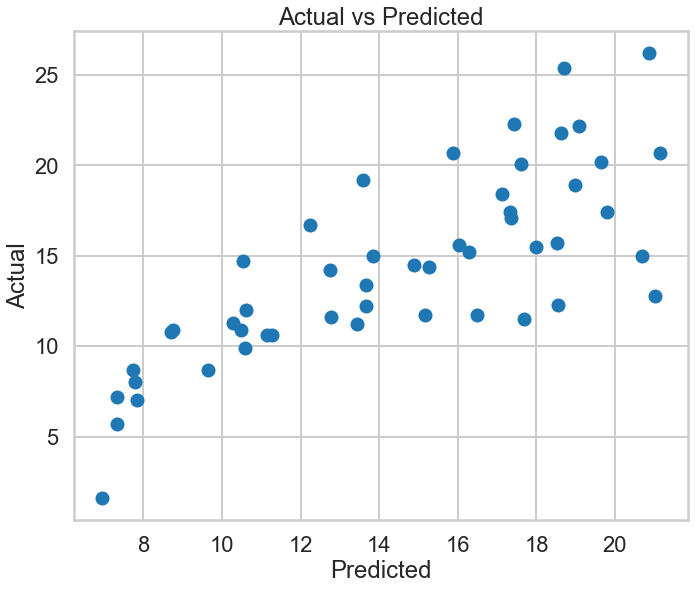

In [26]:
### Predict and get results
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(linreg_TV_results, ignore_index=True)

Eventhough TV is more correlated and linear on Sales, this model does not perform well compared to the model that uses all features.

=========The top 2 predictor variables based on the EDA above are TV and Radio, so let's see if the combination of these variables makes a better model.

R2: 0.7514828621180167
MAE: 1.4324805696789824
MSE: 4.63920968830152
RMSE: 2.1538824685440754
Cross-Val Results: [0.87936561 0.85860496 0.92960574 0.89040105 0.93302554 0.93129743
 0.76486772 0.91373255 0.83925519 0.92951475]
Cross-Val Mean: 0.8869670516810129


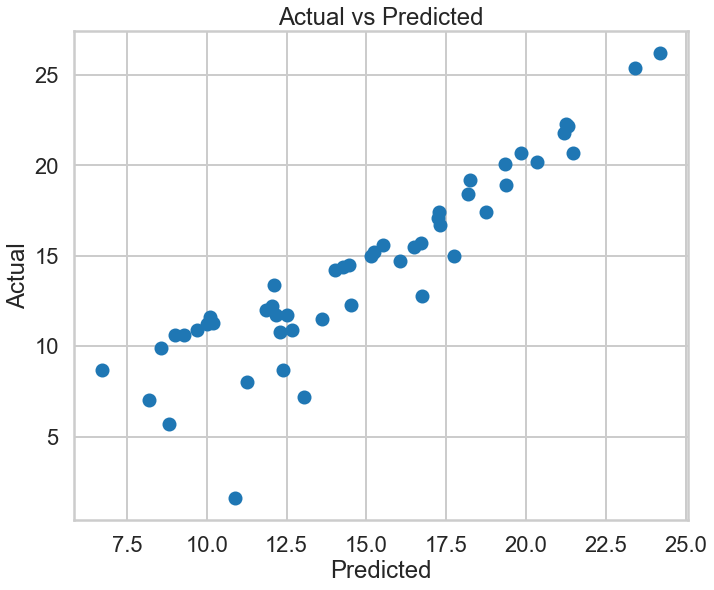

In [27]:
linreg_TVR_results = linreg_model(x_train[["TV", "radio"]], x_test[["TV", "radio"]])

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x[["TV", "radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

linreg_TVR_results.update({"Predictor/s":"TV & radio", "Cross-Val Mean": cv_score.mean() * 100})

df_results = df_results.append(linreg_TVR_results, ignore_index=True)

This model is slightly better than the model that uses all of the predictor variables.

# Result

In [28]:
df_results.set_index("Predictor/s", inplace = True)
df_results.head()

,R2,MAE,MSE,RMSE,Cross-Val Mean
Predictor/s,,,,,
All,75.055494,1.433787,4.683699,2.164186,88.535622
TV,43.645836,2.384758,10.210414,3.195374,56.869659
TV & radio,75.148286,1.432481,4.639210,2.153882,88.696705


The Linear Regression model that uses the predictors TV and Radio performs the best out of all the models tried.

These results mean that advertising on TV and Radio contribute the most in Sales...


The total sales generated by the "Tv and Radio"....